# LEVEL-2   TASK-1: Table Booking and Online Delivery

- Determine the percentage of restaurants that offer table booking and online delivery.
- Compare the average ratings of restaurants with table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges.

In [1]:
# Importing Required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
df = pd.read_csv('Dataset .csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print('No of Duplicates: ', duplicates)

No of Duplicates:  0


In [4]:
# Checking for Missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
# Dropping the null values
df = df.dropna()

### percentage of restaurants that offer table booking and online delivery.

Percentage of restaurants that offer Table Booking :  12.14%
Percentage of restaurants that offer online delivery :  25.69


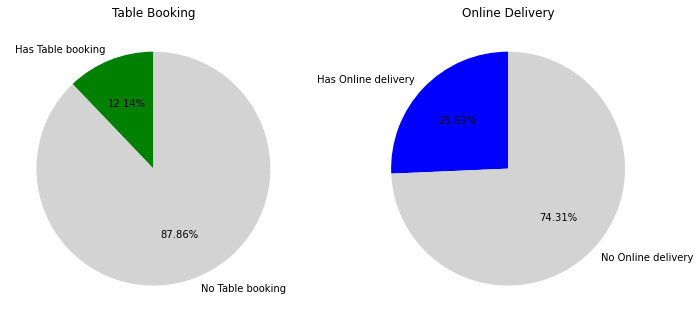

In [6]:
# Determine the percentage of restaurants that offer table booking and online delivery.

table_booking_percentage = (df[df['Has Table booking'] == 'Yes'].shape[0] / len(df)) * 100
online_delivery_percentage = (df[df['Has Online delivery'] == 'Yes'].shape[0] / len(df)) * 100
                                 
print('Percentage of restaurants that offer Table Booking : ',f"{table_booking_percentage:.2f}%")

print('Percentage of restaurants that offer online delivery : ',f"{online_delivery_percentage:.2f}")


percentages = [table_booking_percentage, 100-table_booking_percentage, online_delivery_percentage, 100-online_delivery_percentage]
labels =['Has Table booking', 'No Table booking', 'Has Online delivery', 'No Online delivery']
colors = ['green', 'lightgray', 'blue', 'lightgray']

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.pie(percentages[:2], labels=labels[:2], colors=colors[:2], autopct = '%1.2f%%', startangle = 90)
plt.title('Table Booking')

plt.subplot(1,2,2)
plt.pie(percentages[2:], labels=labels[2:], colors=colors[2:], autopct = '%1.2f%%', startangle = 90)
plt.title('Online Delivery')

plt.tight_layout()
plt.show()

### average ratings of restaurants with table booking and those without.

In [7]:
# Compare the average ratings of restaurants with table booking and those without.

avg_rating_With_Booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()

avg_rating_WithOut_Booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print('Average ratings of restaurants that offer  Table Booking : ',f"{avg_rating_With_Booking:.2f}%")

print('Average ratings of restaurants that doesn\'t offer Table Booking : ',f"{avg_rating_WithOut_Booking:.2f}%")

Average ratings of restaurants that offer  Table Booking :  3.44%
Average ratings of restaurants that doesn't offer Table Booking :  2.56%


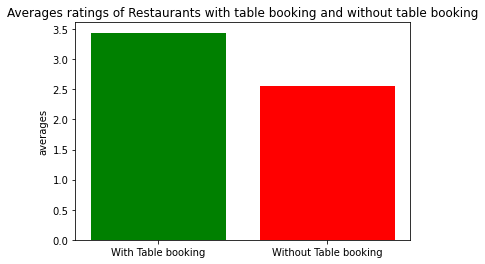

In [8]:
names = ['With Table booking', 'Without Table booking']

averages = [avg_rating_With_Booking, avg_rating_WithOut_Booking]

plt.bar(names, averages, color = ['green', 'red'])

plt.ylabel('averages')
plt.title('Averages ratings of Restaurants with table booking and without table booking')
plt.show()

### Availability of online delivery among restaurants with different price ranges.

In [9]:
price_ranges = df['Average Cost for two'].apply(lambda x: 'Low' if x<500 else 'Medium' if 500<=x<=1000 else 'High')
online_deliveries_by_price_range = df.groupby(price_ranges)['Has Online delivery'].value_counts().unstack()

print(online_deliveries_by_price_range)

Has Online delivery     No   Yes
Average Cost for two            
High                   845   330
Low                   4433   732
Medium                1813  1389


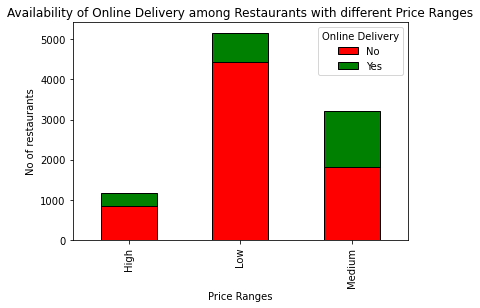

In [10]:
online_deliveries_by_price_range.plot(kind = 'bar', stacked = True, color = ['red','green'], edgecolor = 'black')

plt.legend(title = 'Online Delivery')
plt.title('Availability of Online Delivery among Restaurants with different Price Ranges')
plt.xlabel('Price Ranges')
plt.ylabel('No of restaurants')
plt.show()

## Insights from TASK-1:

- There are only 9 null values in Cuisines feature. As there are very less records dropped from the data.
- Percentage of restaurants that offer Table Booking is :  12.14%
- Percentage of restaurants that offer online delivery is :  25.69
- The Average ratings of restaurants that offers Table Booking is :  3.44%
- The Availability of online delivery for `Medium` price range is more in number compare to others.

# Task- 2 : Price Range Analysis

- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.

### The most common price range among all the restaurants.

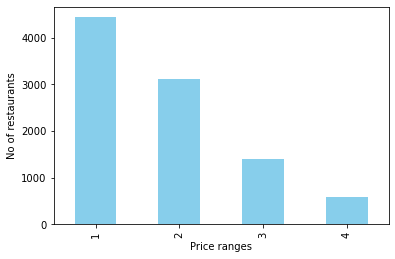

Common price range among all restaurants :  1


In [11]:
# Determine the most common price range among all the restaurants.

price_ranges = df['Price range'].value_counts()
price_ranges.plot(kind = 'bar', color = 'skyblue')
plt.ylabel('No of restaurants')
plt.xlabel('Price ranges')
plt.show()
common_price_range = df['Price range'].mode()[0]
print('Common price range among all restaurants : ',common_price_range)

### Average rating for each price range.

In [12]:
# Calculate the average rating for each price range.
df.groupby('Price range')['Aggregate rating'].mean()

Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64

### Highest average rating among different price ranges.

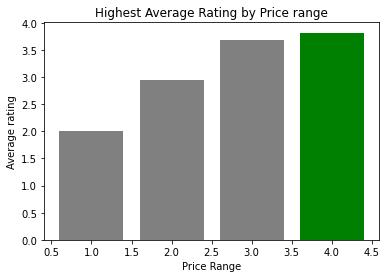

In [19]:
# Identify the color that represents the highest average rating among different price ranges.

avg_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
highest_avg_rating_clr = avg_rating_by_price_range.idxmax()

plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color = 'gray')

plt.bar(highest_avg_rating_clr, avg_rating_by_price_range[highest_avg_rating_clr], color = 'green')

plt.title('Highest Average Rating by Price range')
plt.xlabel('Price Range')
plt.ylabel('Average rating')
plt.show()

## Insights from TASK-2:

- Common price range among all restaurants is 1.
- The `Green` color indicates the highest Average rating among different price ranges.

# TASK-3 : Feature Engineering

- Extract additional features from the existing columns, such as the length of the restaurant name or address.
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

### Additional features from the existing columns

In [21]:
# The length of the restaurant name
df['Restaurant_Name_length'] = df['Restaurant Name'].apply(lambda x: len(x))

# The length of the restaurant Address
df['Restaurant_Address_length'] = df['Address'].apply(lambda x: len(x))

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_Name_length,Restaurant_Address_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


### Creating new features by encoding categorical variables.

In [24]:
# "Has Table Booking" column  
df['Has Table booking'] = np.where(df['Has Table booking'] == 'Yes', 1, 0)
# "Has Online Delivery" column
df['Has Online delivery'] = np.where(df['Has Online delivery'] == 'Yes', 1, 0)

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant_Name_length,Restaurant_Address_length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,0,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,0,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,0,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,0,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [25]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Restaurant_Name_length', 'Restaurant_Address_length'],
      dtype='object')

## Insights From TASK-3:

- New columns like Restaurant_Name_length, Restaurant_Address_length were added by using existing features.
- Binary class categorical features were encoded with 1 & 0.